In [34]:
#Familiarizig with data
#Q1.1
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as scstats
from sklearn.metrics import mutual_info_score
df=pd.read_csv("C://Users/Eden/Desktop/bank-full_2016.csv")

In [35]:
#Q1.2
df.shape

(45211, 17)

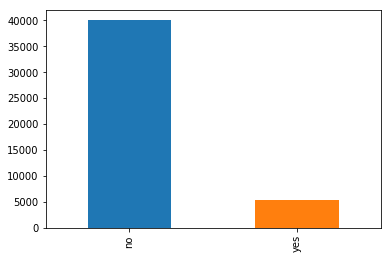

In [36]:
#Q1.2
display(df["outcome"].value_counts().plot(kind='bar'))

In [37]:
#Q1.2
display(df.head(5))

,age,job,marital,education,default_credit,balance,housing_loan,personal_loan,contact,day,month,duration,campaign,days_from_last_contact,previous_campaign_contacts,previous_campaign_outcome,outcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,NaN,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,NaN,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,NaN,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,NaN,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,NaN,0,unknown,no


In [38]:
#Q1.3
df.dtypes

age                             int64
job                            object
marital                        object
education                      object
default_credit                 object
balance                         int64
housing_loan                   object
personal_loan                  object
contact                        object
day                             int64
month                          object
duration                        int64
campaign                        int64
days_from_last_contact        float64
previous_campaign_contacts      int64
previous_campaign_outcome      object
outcome                        object
dtype: object

In [39]:
#Manipulating data frames
#1
df["IsContantKnown"]=(df["contact"]!="unknown")

In [40]:
#2
df["campaign"]=df["campaign"].astype('category')

In [41]:
#Data distribution
#1
display(df.describe())

,age,balance,day,duration,days_from_last_contact,previous_campaign_contacts
count,45211.000000,45211.000000,45211.000000,45211.000000,8257.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,224.577692,0.580323
std,10.618762,3044.765829,8.322476,257.527812,115.344035,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,133.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,194.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,327.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,871.000000,275.000000


[]

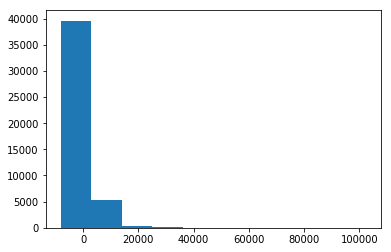

In [42]:
#2
plt.hist(df["balance"])
plt.plot()

[]

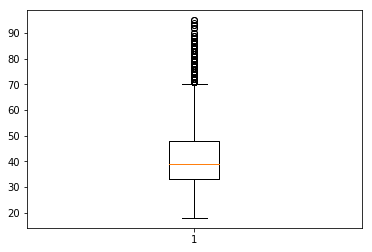

In [43]:
#2
plt.boxplot(df["age"])
plt.plot()

[]

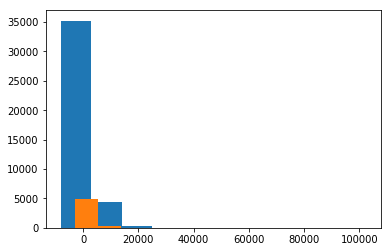

In [44]:
#3
plt.hist(df[df["outcome"]=="no"]["balance"])
plt.hist(df[df["outcome"]=="yes"]["balance"])
plt.plot()

They have different values but same proportions and distribution

In [45]:
#Q2
#Missing values
#1
df.isnull().sum()

age                               0
job                               0
marital                           0
education                         0
default_credit                    0
balance                           0
housing_loan                      0
personal_loan                     0
contact                           0
day                               0
month                             0
duration                          0
campaign                          0
days_from_last_contact        36954
previous_campaign_contacts        0
previous_campaign_outcome         0
outcome                           0
IsContantKnown                    0
dtype: int64

In [46]:
#2
df2=df[(df["contact"]!="cellular") & (df["contact"]!="telephone")]

#3
The missing values represent people who never had any campaign. We can see that any customer who's days_from_last_contact is NaN also has 0 in previous_campaign_contacts and unknown in previous_campaign_outcome. This clearly supports our assumption that they had no campaign before.

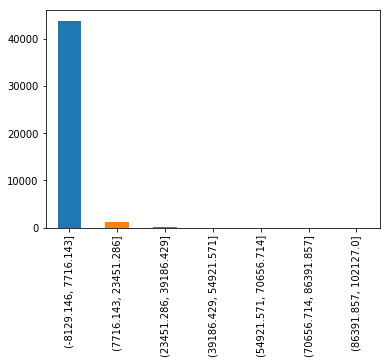

In [47]:
#Discretization
#1
display(pd.cut(df["balance"],7).value_counts().plot(kind='bar'))

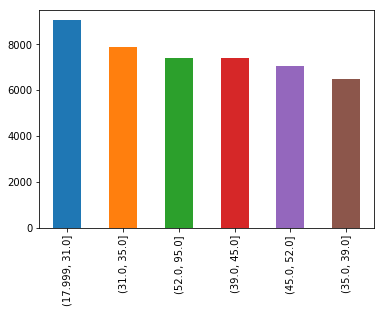

In [48]:
#2
display(pd.qcut(df["age"],6).value_counts().plot(kind='bar'))

#Q2 Discertization part 3: Change the month into numbers (month numbers) and then represent an equal-depth plot, which will let us see loan related information partitoned by periods.

In [49]:
#Q3
#Correlation
#1
df[["age","balance"]].corr() #Pearson

,age,balance
age,1.000000,0.097783
balance,0.097783,1.000000


In [50]:
#1
df[["age","balance"]].corr(method="spearman")

,age,balance
age,1.00000,0.09638
balance,0.09638,1.00000


In [51]:
#2
df.corr()

,age,balance,day,duration,days_from_last_contact,previous_campaign_contacts,IsContantKnown
age,1.000000,0.097783,-0.009120,-0.004648,-0.107863,0.001288,0.020132
balance,0.097783,1.000000,0.004503,0.021560,-0.108122,0.016674,0.037331
day,-0.009120,0.004503,1.000000,-0.030206,-0.090095,-0.051710,0.034103
duration,-0.004648,0.021560,-0.030206,1.000000,-0.024407,0.001203,0.014379
days_from_last_contact,-0.107863,-0.108122,-0.090095,-0.024407,1.000000,-0.021885,-0.162032
previous_campaign_contacts,0.001288,0.016674,-0.051710,0.001203,-0.021885,1.000000,0.154162
IsContantKnown,0.020132,0.037331,0.034103,0.014379,-0.162032,0.154162,1.000000


[]

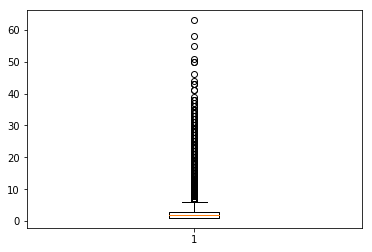

In [52]:
#Q4
#Outliers
plt.boxplot(df["campaign"])
plt.plot()

The dots are outliers, so as you can see there are many of them.
We have also used the describe function above, and it shows that the max. number is 63, while the mean is 2, and we can also see that only 75% of the data < 3

In [53]:
#Normalization
data = df["days_from_last_contact"]
normalized_data = (data - np.nanmin(data))/(np.nanmax(data) - np.nanmin(data))

In [54]:
#Q3
#Mutual Information - Bonus
#Entropy
max_entropy = 0
max_attr = None
for col in df:
    p_data= df[col].value_counts()/len(df[col])
    entropy=scstats.entropy(p_data)
    if(entropy>=max_entropy): #'>=' so the None is always replaced.
        max_entropy = entropy
        max_attr = col
print(max_attr)

balance


In [55]:
max_mi = 0
max_attr = None
x = [1 if df['outcome'][i]=='yes' else 0 for i in range(len(df['outcome']))]
for col in df:
    if col!='outcome':
        c_xy = np.histogram2d(df[col], x)[0]
        mi = mutual_info_score(None, None, contingency=c_xy)
        if(mi >= max_mi): #same here
            max_mi = mi
            max_attr = col

ValueError: could not convert string to float: 'admin.'